In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import sklearn_pandas
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.tree
import sklearn.ensemble
import sklearn.neighbors
import sklearn.naive_bayes
import sklearn.neural_network
import warnings
warnings.filterwarnings("ignore")

In [3]:
data1 = pd.read_csv("breast-cancer-wisconsin.data")
#print(data1)
#X=np.ndarray(shape=(568,10))
data = pd.read_csv("wdbc.data")
data.columns = [
    "ID", "Diagnosis","radius", "texture", "perimeter",
    "area", "smoothness", "compactness", "concavity", "concave points",
    "symmetry", "fractal dimension","radius1", "texture1", "perimeter1",
    "area1", "smoothness1", "compactness1", "concavity1", "concave points1",
    "symmetry1", "fractal dimension1","radius2", "texture2", "perimeter2",
    "area2", "smoothness2", "compactness2", "concavity2", "concave points2",
    "symmetry2", "fractal dimension2"]
data['radius'] =data['radius']+data['radius1']+data['radius2']
data['texture'] =data['texture']+data['texture1']+data['texture2']
data['perimeter'] =data['perimeter']+data['perimeter1']+data['perimeter2']
data['area'] =data['area']+data['area1']+data['area2']
data['smoothness'] =data['smoothness']+data['smoothness1']+data['smoothness2']
data['compactness'] =data['compactness']+data['compactness1']+data['compactness2']
data['concavity'] =data['concavity']+data['concavity1']+data['concavity2']
data['concave points'] =data['concave points']+data['concave points1']+data['concave points2']
data['symmetry'] =data['symmetry']+data['symmetry1']+data['symmetry2']
data['fractal dimension'] =data['fractal dimension']+data['fractal dimension1']+data['fractal dimension2']
#print(data.columns)
data = data.drop(['radius1', 'texture1', 'perimeter1',
    'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave points1',
    'symmetry1', 'fractal dimension1','radius2', 'texture2', 'perimeter2',
    'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave points2',
    'symmetry2', 'fractal dimension2'], axis=1)
#data = data.as_matrix()
#for i in range(2,12):
#    j=0
#    value = data[:,i]+data[:,i+10]+data[:,i+20]
#    X[:,j]=value
#    j=j+1
#print(X[0,:])
#print(radius)
# print(data)

In [12]:
data.head()

ID  Diagnosis   radius  texture  perimeter     area  smoothness  \
0    842517          1  46.1035  41.9139    295.098  3356.08    0.213765   
1  84300903          1  44.0056  47.5669    287.085  3006.03    0.260150   
2  84348301          1  26.8256  48.0360    179.895   981.03    0.361410   
3  84358402          1  43.5872  31.7913    292.738  2966.44    0.249190   
4    843786          1  28.2545  40.3402    188.187  1245.89    0.314410   

   compactness  concavity  concave points  symmetry  fractal dimension  
0      0.27832    0.34710         0.26957   0.47009           0.149222  
1      0.62446    0.68612         0.39148   0.59070           0.152141  
2      1.22478    0.98491         0.38137   0.98313           0.279648  
3      0.36241    0.65488         0.28565   0.43486           0.140725  
4      0.72835    0.73002         0.26636   0.62885           0.205612

In [ ]:
#data.describe()

In [4]:
diagnosis = {'M':1,'B':0}
print(data['Diagnosis'])
data['Diagnosis'] = [diagnosis[i] for i in data['Diagnosis']]
y = data['Diagnosis'].values
# print(y)

0      M
1      M
2      M
3      M
4      M
      ..
563    M
564    M
565    M
566    M
567    B
Name: Diagnosis, Length: 568, dtype: object


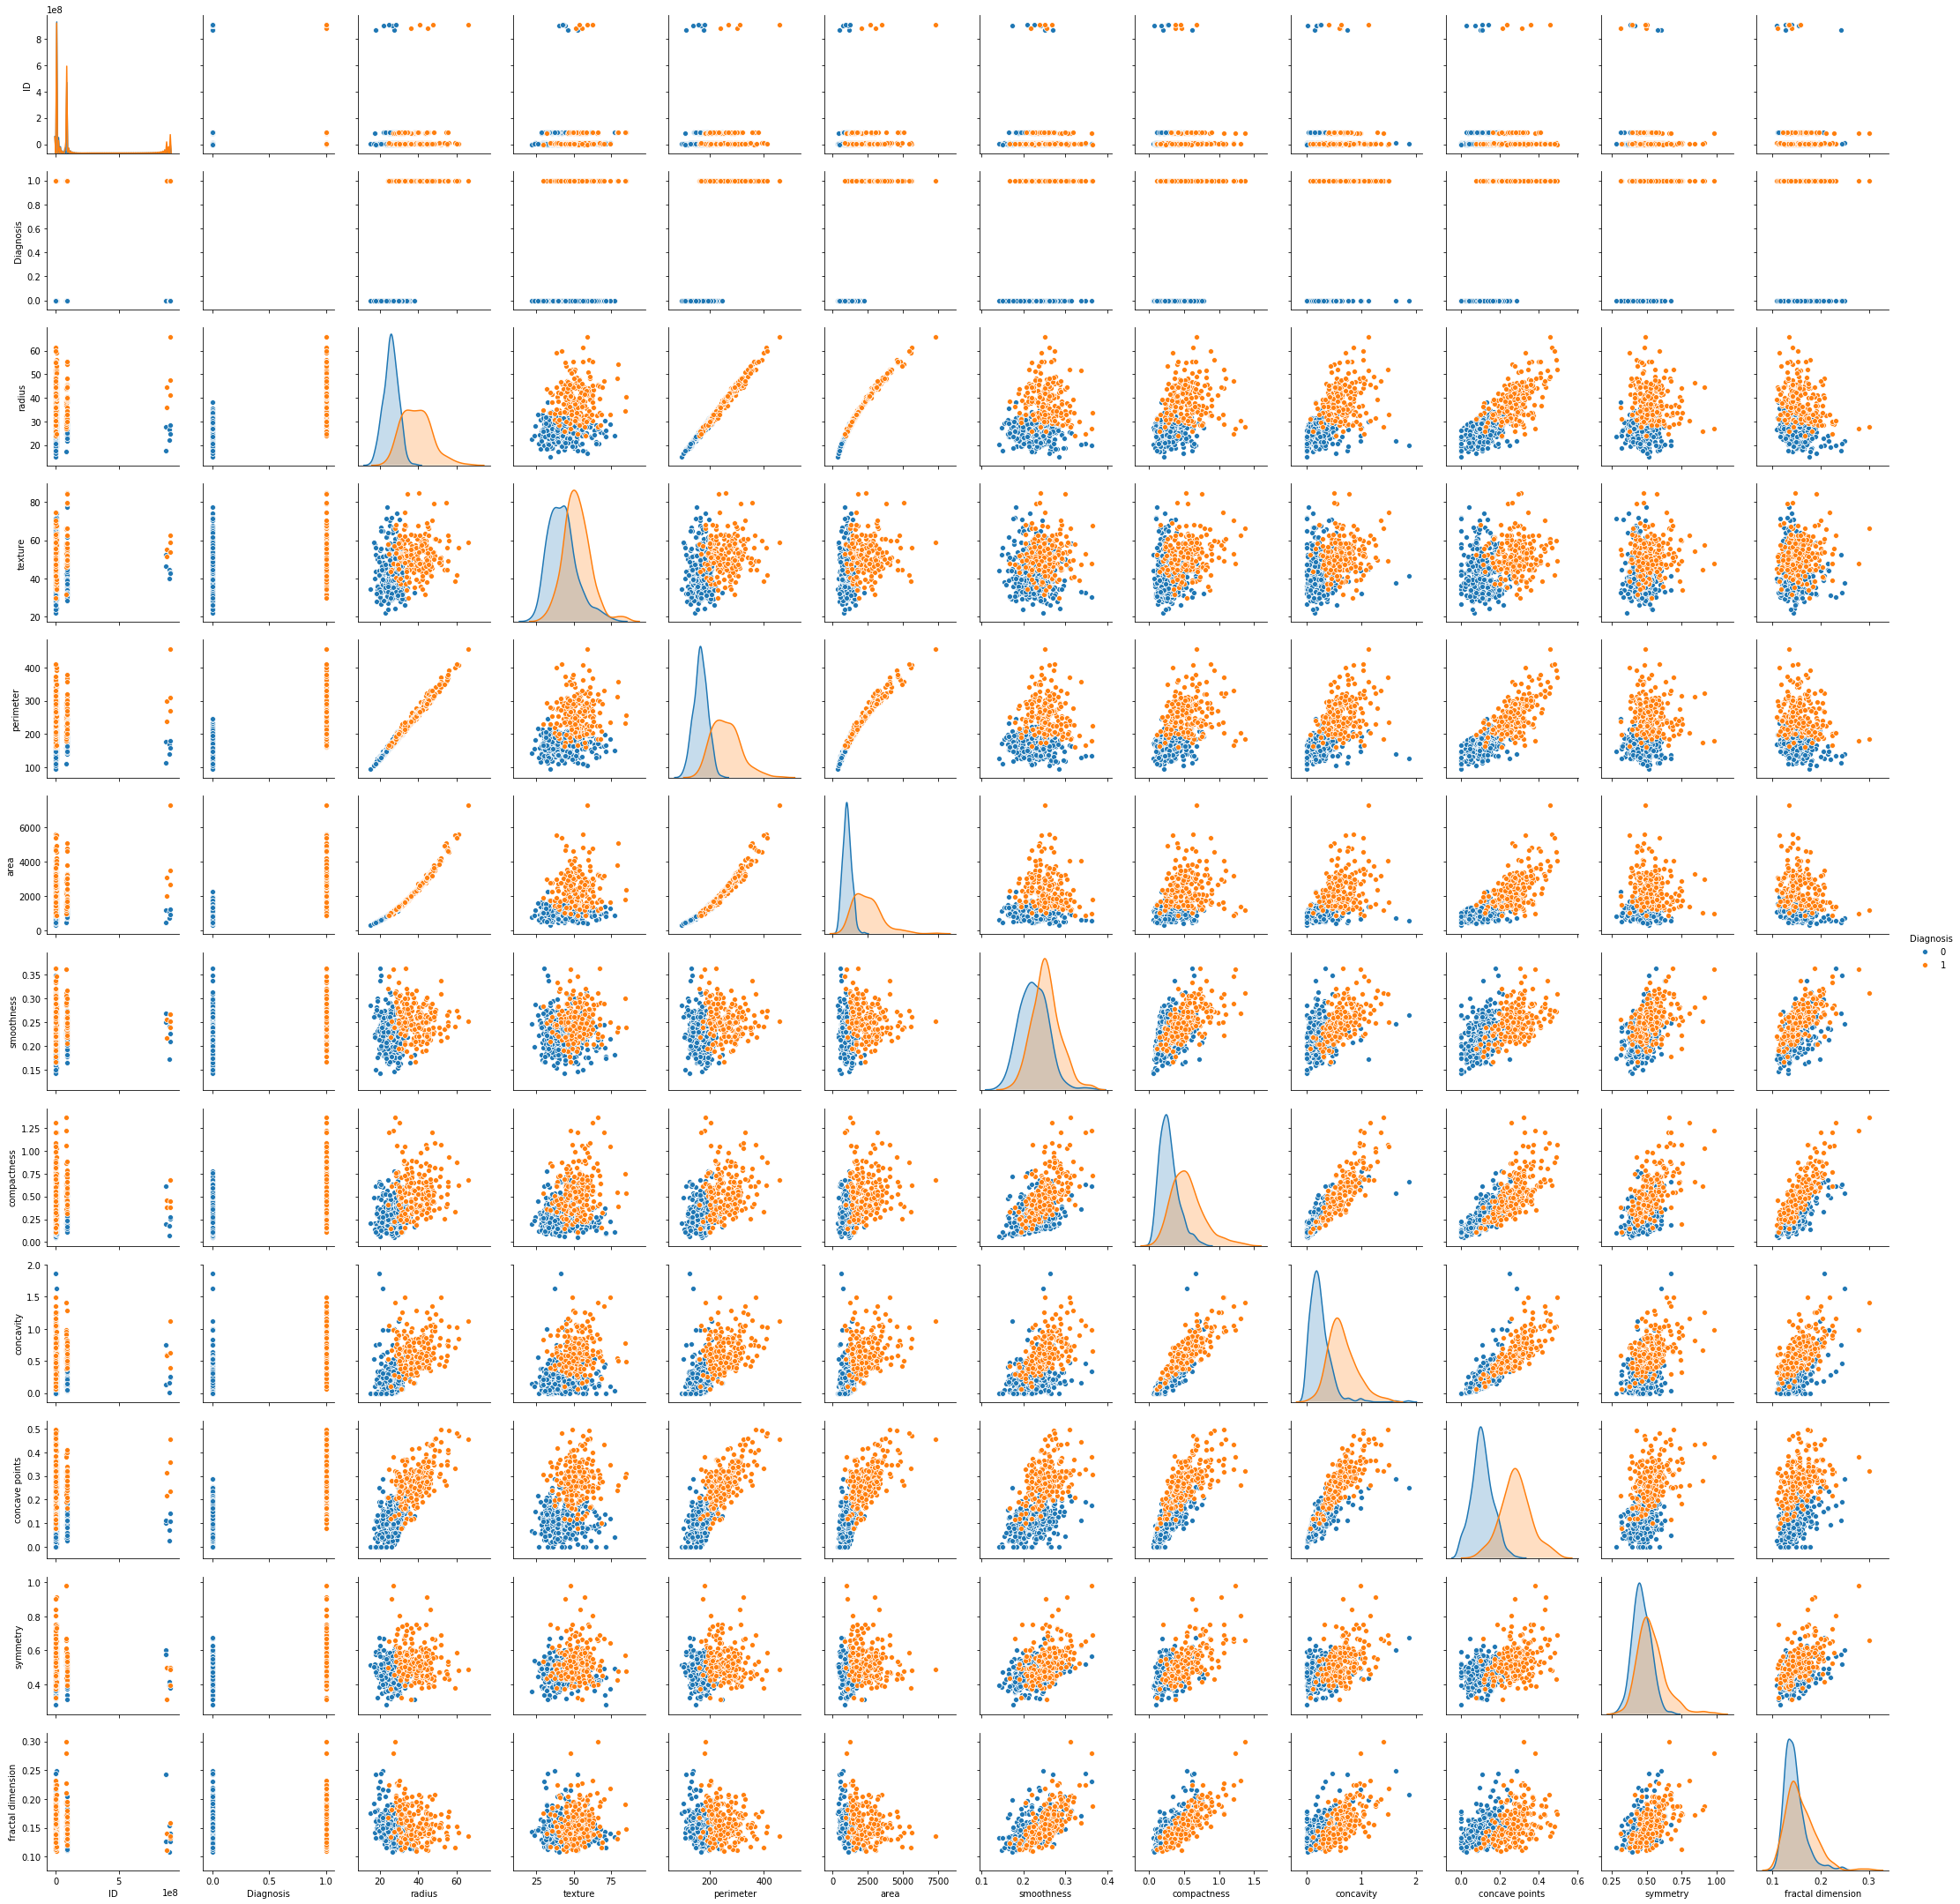

In [10]:
sns.pairplot(data, hue = 'Diagnosis')

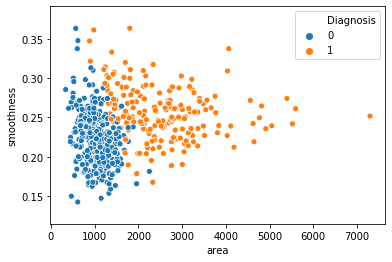

In [13]:
#scatter plot with possibility of several semantic groupings. The relationship between x and y can be shown for 
#different subsets of the data using the hue, size, and style parameters
sns.scatterplot(x='area', y='smoothness',hue = 'Diagnosis', data = data)

In [4]:
data = data.drop(['ID','Diagnosis'],axis = 1)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data, y, test_size=0.33, stratify=y, random_state=0)

In [5]:
mapper = sklearn_pandas.DataFrameMapper([([col,], sklearn.preprocessing.StandardScaler(),) for col in data.columns])

In [6]:
logistic_regression = sklearn.linear_model.LogisticRegression(random_state=0)
#The purpose of the pipeline is to assemble several steps that can be cross-validated together 
#while setting different parameters.
pipeline = sklearn.pipeline.Pipeline([
    ("scale", mapper,),
    ("logit", logistic_regression,)
])
#perform a grid search with cross validation(StratifiedKFold) over 2 hyperparameters(C, class weight)
strat_kfold = sklearn.model_selection.StratifiedKFold(10, random_state=0,)
estimator = sklearn.model_selection.GridSearchCV(
    pipeline,
    param_grid={
        "logit__C": np.power(10, np.arange(-4.0, 5.0)),
        "logit__class_weight": ["balanced", None,],
    },
#roc_auc_score implementation is restricted to the binary classification task or multilabel classification task in label indicator
    scoring=sklearn.metrics.make_scorer(sklearn.metrics.roc_auc_score),
    cv=strat_kfold,
)
estimator.fit(X_train, y_train)
print(estimator.best_params_)

#performance on training set
y_train_predicted = estimator.predict(X_train)
print("Training set accuracy score: {}".format(
    sklearn.metrics.accuracy_score(y_train, y_train_predicted)
))

#performance on testing set
y_test_predicted = estimator.predict(X_test)
print("Testing set accuracy score: {}".format(
    sklearn.metrics.accuracy_score(y_test, y_test_predicted)
))

cv_results_df = pd.DataFrame(estimator.cv_results_)
cv_results_df.sort_values(by="rank_test_score").head(5)

{'logit__C': 1.0, 'logit__class_weight': None}
Training set accuracy score: 0.9842105263157894
Testing set accuracy score: 0.9627659574468085


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
9        0.035499      0.005458         0.018067        0.001724   
13       0.038754      0.005369         0.016981        0.003776   
11       0.038813      0.002905         0.016370        0.004399   
8        0.034288      0.003061         0.014660        0.002508   
10       0.036746      0.004886         0.016278        0.001997   

   param_logit__C param_logit__class_weight  \
9               1                      None   
13            100                      None   
11             10                      None   
8               1                  balanced   
10             10                  balanced   

                                               params  split0_test_score  \
9      {'logit__C': 1.0, 'logit__class_weight': None}           0.979167   
13   {'logit__C': 100.0, 'logit__class_weight': None}           0.979167   
11    {'logit__C': 10.0, 'logit__class_weight': None}           0.979167   
8   {'logit__C': 1.0, 'logit__class_weight': 'bala...           0.979167   
10  {'logit__C': 10.0, 'logit__class_weight': 'bal...           0.979167   

    split1_test_score  split2_test_score  split3_test_score  \
9            0.964286           0.964286           0.964286   
13           1.000000           0.964286           0.943452   
11           0.964286           0.964286           0.964286   
8            1.000000           0.964286           0.964286   
10           1.000000           0.964286           0.943452   

    split4_test_score  split5_test_score  split6_test_score  \
9            0.964286           0.964286           1.000000   
13           0.964286           0.964286           1.000000   
11           0.964286           0.964286           1.000000   
8            0.943452           0.964286           0.979167   
10           0.964286           0.964286           0.979167   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
9            1.000000                1.0           1.000000         0.980005   
13           0.979167                1.0           1.000000         0.979409   
11           0.979167                1.0           1.000000         0.977921   
8            0.979167                1.0           0.978261         0.975209   
10           0.958333                1.0           0.978261         0.973126   

    std_test_score  rank_test_score  
9         0.016807                1  
13        0.019141                2  
11        0.015435                3  
8         0.016285                4  
10        0.016964                5

In [7]:
#Compute confusion matrix to evaluate the accuracy of a classification
#building confusion matrix to check precision, recall
def _build_df_from_confusion_matrix(confusion_matrix, as_fractions=False):
    if as_fractions:
        x = np.array(confusion_matrix)
        x = np.apply_along_axis(
            lambda row: [
                row[0] / (row[0] + row[1]),
                row[1] / (row[0] + row[1])
            ],
            1,
            x
        )
    else:
        x = confusion_matrix
    df = pd.DataFrame(
        x,
        index=["M", "B"],
        columns=["M", "B"]
    )
    df.index.names = ["Actual"]
    df.columns.names = ["Predicted"]
    return df

In [8]:
# AUROC score, Precision, recall, fscore
print("Training set AUROC score: {}".format(estimator.score(X_train, y_train)))
print("\nConfusion matrix for training set:")
training_confusion_matrix = sklearn.metrics.confusion_matrix(
    y_train, y_train_predicted
)
display(_build_df_from_confusion_matrix(training_confusion_matrix))
print("Precision, recall, f-score:")
sklearn.metrics.precision_recall_fscore_support(y_train, y_train_predicted)

Training set AUROC score: 0.9801774533368943

Confusion matrix for training set:


Predicted    M    B
Actual             
M          238    1
B            5  136

Precision, recall, f-score:


(array([0.97942387, 0.99270073]),
 array([0.9958159 , 0.96453901]),
 array([0.98755187, 0.97841727]),
 array([239, 141], dtype=int64))

In [9]:
# AUROC score, Precision, recall, fscore on testing dataset
print("Testing set AUROC score: {}".format(estimator.score(X_test, y_test)))
print("\nConfusion matrix for testing set:")
testing_confusion_matrix = sklearn.metrics.confusion_matrix(
    y_test, y_test_predicted
)
display(_build_df_from_confusion_matrix(testing_confusion_matrix))
print("Precision, recall, f-score:")
sklearn.metrics.precision_recall_fscore_support(y_test, y_test_predicted)

Testing set AUROC score: 0.9616222760290558

Confusion matrix for testing set:


Predicted    M   B
Actual            
M          114   4
B            3  67

Precision, recall, f-score:


(array([0.97435897, 0.94366197]),
 array([0.96610169, 0.95714286]),
 array([0.97021277, 0.95035461]),
 array([118,  70], dtype=int64))

In [12]:
#Decision Tree
#For more than one value it becomes overtfit.
md = [1]
dt_model = sklearn.tree.DecisionTreeClassifier(random_state=0)
pipeline = sklearn.pipeline.Pipeline([
    ("scale", mapper,),
    ("dt", dt_model,)])
strat_kfold = sklearn.model_selection.StratifiedKFold(10, random_state=0,)
estimator = sklearn.model_selection.GridSearchCV(
    pipeline,
    param_grid={
        "dt__max_depth": md,
        },
        #roc_auc_score implementation is restricted to the binary classification task or multilabel classification task in label indicator
        scoring=sklearn.metrics.make_scorer(sklearn.metrics.roc_auc_score),
        cv=strat_kfold,
)
estimator.fit(X_train, y_train)
print(estimator.best_params_)
y_predicted = estimator.predict(X_train)

print("Training set accuracy score for decision trees: {}".format(
    sklearn.metrics.accuracy_score(y_train, y_predicted)
))

#performance on testing set
y_test_predicted = estimator.predict(X_test)
print("Testing set accuracy score: {}".format(
    sklearn.metrics.accuracy_score(y_test, y_test_predicted)
))

{'dt__max_depth': 1}
Training set accuracy score for decision trees: 0.9315789473684211
Testing set accuracy score: 0.9095744680851063


In [13]:
# AUROC score, Precision, recall, fscore
print("Training set AUROC score: {}".format(estimator.score(X_train, y_train)))
print("\nConfusion matrix for training set:")
training_confusion_matrix = sklearn.metrics.confusion_matrix(
    y_train, y_train_predicted
)
display(_build_df_from_confusion_matrix(training_confusion_matrix))
print("Precision, recall, f-score:")
sklearn.metrics.precision_recall_fscore_support(y_train, y_train_predicted)

Training set AUROC score: 0.9150716638475919

Confusion matrix for training set:


Predicted    M    B
Actual             
M          238    1
B            5  136

Precision, recall, f-score:


(array([0.97942387, 0.99270073]),
 array([0.9958159 , 0.96453901]),
 array([0.98755187, 0.97841727]),
 array([239, 141], dtype=int64))

In [14]:
# AUROC score, Precision, recall, fscore on testing dataset
print("Testing set AUROC score: {}".format(estimator.score(X_test, y_test)))
print("\nConfusion matrix for testing set:")
testing_confusion_matrix = sklearn.metrics.confusion_matrix(
    y_test, y_test_predicted
)
display(_build_df_from_confusion_matrix(testing_confusion_matrix))
print("Precision, recall, f-score:")
sklearn.metrics.precision_recall_fscore_support(y_test, y_test_predicted)

Testing set AUROC score: 0.8960048426150122

Confusion matrix for testing set:


Predicted    M   B
Actual            
M          112   6
B           11  59

Precision, recall, f-score:


(array([0.91056911, 0.90769231]),
 array([0.94915254, 0.84285714]),
 array([0.92946058, 0.87407407]),
 array([118,  70], dtype=int64))

In [15]:
#Random Forest
md = [1]
rf_model = sklearn.ensemble.RandomForestClassifier(random_state=0)
pipeline = sklearn.pipeline.Pipeline([
    ("scale", mapper,),
    ("rf", rf_model,)])
strat_kfold = sklearn.model_selection.StratifiedKFold(10, random_state=0,)
estimator = sklearn.model_selection.GridSearchCV(
    pipeline,
    param_grid={
        "rf__max_depth": md,
        },
        #roc_auc_score implementation is restricted to the binary classification task or multilabel classification task in label indicator
        scoring=sklearn.metrics.make_scorer(sklearn.metrics.roc_auc_score),
        cv=strat_kfold,
)
estimator.fit(X_train, y_train)
print(estimator.best_params_)
y_predicted = estimator.predict(X_train)

print("Training set accuracy score for random forest: {}".format(
    sklearn.metrics.accuracy_score(y_train, y_predicted)
))

#performance on testing set
y_test_predicted = estimator.predict(X_test)
print("Testing set accuracy score: {}".format(
    sklearn.metrics.accuracy_score(y_test, y_test_predicted)
))

{'rf__max_depth': 1}
Training set accuracy score for random forest: 0.9368421052631579
Testing set accuracy score: 0.9095744680851063


In [16]:
# AUROC score, Precision, recall, fscore
print("Training set AUROC score: {}".format(estimator.score(X_train, y_train)))
print("\nConfusion matrix for training set:")
training_confusion_matrix = sklearn.metrics.confusion_matrix(
    y_train, y_train_predicted
)
display(_build_df_from_confusion_matrix(training_confusion_matrix))
print("Precision, recall, f-score:")
sklearn.metrics.precision_recall_fscore_support(y_train, y_train_predicted)

Training set AUROC score: 0.9221638624291523

Confusion matrix for training set:


Predicted    M    B
Actual             
M          238    1
B            5  136

Precision, recall, f-score:


(array([0.97942387, 0.99270073]),
 array([0.9958159 , 0.96453901]),
 array([0.98755187, 0.97841727]),
 array([239, 141], dtype=int64))

In [17]:
# AUROC score, Precision, recall, fscore on testing dataset
print("Testing set AUROC score: {}".format(estimator.score(X_test, y_test)))
print("\nConfusion matrix for testing set:")
testing_confusion_matrix = sklearn.metrics.confusion_matrix(
    y_test, y_test_predicted
)
display(_build_df_from_confusion_matrix(testing_confusion_matrix))
print("Precision, recall, f-score:")
sklearn.metrics.precision_recall_fscore_support(y_test, y_test_predicted)

Testing set AUROC score: 0.8989104116222761

Confusion matrix for testing set:


Predicted    M   B
Actual            
M          111   7
B           10  60

Precision, recall, f-score:


(array([0.91735537, 0.89552239]),
 array([0.94067797, 0.85714286]),
 array([0.92887029, 0.87591241]),
 array([118,  70], dtype=int64))

In [20]:
#K Nearest Neighbors
neighbor = [5,10,15,20,]
knn_model = sklearn.neighbors.KNeighborsClassifier()
pipeline = sklearn.pipeline.Pipeline([
    ("scale", mapper,),
    ("knn", knn_model,)])
strat_kfold = sklearn.model_selection.StratifiedKFold(10, random_state=0,)
estimator = sklearn.model_selection.GridSearchCV(
    pipeline,
    param_grid={
        "knn__n_neighbors": neighbor,
        },
        #roc_auc_score implementation is restricted to the binary classification task or multilabel classification task in label indicator
        scoring=sklearn.metrics.make_scorer(sklearn.metrics.roc_auc_score),
        cv=strat_kfold,
)
estimator.fit(X_train, y_train)
print(estimator.best_params_)
y_predicted = estimator.predict(X_train)

print("Training set accuracy score for knn: {}".format(
    sklearn.metrics.accuracy_score(y_train, y_predicted)
))

#performance on testing set
y_test_predicted = estimator.predict(X_test)
print("Testing set accuracy score: {}".format(
    sklearn.metrics.accuracy_score(y_test, y_test_predicted)
))

{'knn__n_neighbors': 5}
Training set accuracy score for knn: 0.9710526315789474
Testing set accuracy score: 0.9521276595744681


In [21]:
# AUROC score, Precision, recall, fscore
print("Training set AUROC score: {}".format(estimator.score(X_train, y_train)))
print("\nConfusion matrix for training set:")
training_confusion_matrix = sklearn.metrics.confusion_matrix(
    y_train, y_train_predicted
)
display(_build_df_from_confusion_matrix(training_confusion_matrix))
print("Precision, recall, f-score:")
sklearn.metrics.precision_recall_fscore_support(y_train, y_train_predicted)

Training set AUROC score: 0.9653550550461438

Confusion matrix for training set:


Predicted    M    B
Actual             
M          238    1
B            5  136

Precision, recall, f-score:


(array([0.97942387, 0.99270073]),
 array([0.9958159 , 0.96453901]),
 array([0.98755187, 0.97841727]),
 array([239, 141], dtype=int64))

In [22]:
# AUROC score, Precision, recall, fscore on testing dataset
print("Testing set AUROC score: {}".format(estimator.score(X_test, y_test)))
print("\nConfusion matrix for testing set:")
testing_confusion_matrix = sklearn.metrics.confusion_matrix(
    y_test, y_test_predicted
)
display(_build_df_from_confusion_matrix(testing_confusion_matrix))
print("Precision, recall, f-score:")
sklearn.metrics.precision_recall_fscore_support(y_test, y_test_predicted)

Testing set AUROC score: 0.9560532687651333

Confusion matrix for testing set:


Predicted    M   B
Actual            
M          111   7
B            2  68

Precision, recall, f-score:


(array([0.98230088, 0.90666667]),
 array([0.94067797, 0.97142857]),
 array([0.96103896, 0.93793103]),
 array([118,  70], dtype=int64))

In [23]:
#AdaBoost classification
est = [1,2] 
boost_model = sklearn.ensemble.AdaBoostClassifier(random_state=0)
pipeline = sklearn.pipeline.Pipeline([
    ("scale", mapper,),
    ("ab", boost_model,)])
strat_kfold = sklearn.model_selection.StratifiedKFold(10, random_state=0,)
estimator = sklearn.model_selection.GridSearchCV(
    pipeline,
    param_grid={
        "ab__n_estimators": est,
        },
        #roc_auc_score implementation is restricted to the binary classification task or multilabel classification task in label indicator
        scoring=sklearn.metrics.make_scorer(sklearn.metrics.roc_auc_score),
        cv=strat_kfold,
)
estimator.fit(X_train, y_train)
print(estimator.best_params_)
y_predicted = estimator.predict(X_train)

print("Training set accuracy score for AdaBoost: {}".format(
    sklearn.metrics.accuracy_score(y_train, y_predicted)
))

#performance on testing set
y_test_predicted = estimator.predict(X_test)
print("Testing set accuracy score: {}".format(
    sklearn.metrics.accuracy_score(y_test, y_test_predicted)
))

{'ab__n_estimators': 1}
Training set accuracy score for AdaBoost: 0.9315789473684211
Testing set accuracy score: 0.9095744680851063


In [24]:
# AUROC score, Precision, recall, fscore
print("Training set AUROC score: {}".format(estimator.score(X_train, y_train)))
print("\nConfusion matrix for training set:")
training_confusion_matrix = sklearn.metrics.confusion_matrix(
    y_train, y_train_predicted
)
display(_build_df_from_confusion_matrix(training_confusion_matrix))
print("Precision, recall, f-score:")
sklearn.metrics.precision_recall_fscore_support(y_train, y_train_predicted)

Training set AUROC score: 0.9150716638475919

Confusion matrix for training set:


Predicted    M    B
Actual             
M          238    1
B            5  136

Precision, recall, f-score:


(array([0.97942387, 0.99270073]),
 array([0.9958159 , 0.96453901]),
 array([0.98755187, 0.97841727]),
 array([239, 141], dtype=int64))

In [25]:
# AUROC score, Precision, recall, fscore on testing dataset
print("Testing set AUROC score: {}".format(estimator.score(X_test, y_test)))
print("\nConfusion matrix for testing set:")
testing_confusion_matrix = sklearn.metrics.confusion_matrix(
    y_test, y_test_predicted
)
display(_build_df_from_confusion_matrix(testing_confusion_matrix))
print("Precision, recall, f-score:")
sklearn.metrics.precision_recall_fscore_support(y_test, y_test_predicted)

Testing set AUROC score: 0.8960048426150122

Confusion matrix for testing set:


Predicted    M   B
Actual            
M          112   6
B           11  59

Precision, recall, f-score:


(array([0.91056911, 0.90769231]),
 array([0.94915254, 0.84285714]),
 array([0.92946058, 0.87407407]),
 array([118,  70], dtype=int64))

In [26]:
#Gaussian navie base
gnb_model = sklearn.naive_bayes.GaussianNB()
pipeline = sklearn.pipeline.Pipeline([
    ("scale", mapper,),
    ("gnb", gnb_model,)])
strat_kfold = sklearn.model_selection.StratifiedKFold(10, random_state=0,)
estimator = sklearn.model_selection.GridSearchCV(
    pipeline,
    param_grid={
        "gnb__var_smoothing": [1e-09, 1e-08,1e-10],
        },
        #roc_auc_score implementation is restricted to the binary classification task or multilabel classification task in label indicator
        scoring=sklearn.metrics.make_scorer(sklearn.metrics.roc_auc_score),
        cv=strat_kfold,
)
estimator.fit(X_train, y_train)
print(estimator.best_params_)
y_predicted = estimator.predict(X_train)

print("Training set accuracy score for Gaussian Naive Bayes: {}".format(
    sklearn.metrics.accuracy_score(y_train, y_predicted)
))

#performance on testing set
y_test_predicted = estimator.predict(X_test)
print("Testing set accuracy score: {}".format(
    sklearn.metrics.accuracy_score(y_test, y_test_predicted)
))

{'gnb__var_smoothing': 1e-09}
Training set accuracy score for Gaussian Naive Bayes: 0.9473684210526315
Testing set accuracy score: 0.9148936170212766


In [27]:
# AUROC score, Precision, recall, fscore
print("Training set AUROC score: {}".format(estimator.score(X_train, y_train)))
print("\nConfusion matrix for training set:")
training_confusion_matrix = sklearn.metrics.confusion_matrix(
    y_train, y_train_predicted
)
display(_build_df_from_confusion_matrix(training_confusion_matrix))
print("Precision, recall, f-score:")
sklearn.metrics.precision_recall_fscore_support(y_train, y_train_predicted)

Training set AUROC score: 0.9407104068369981

Confusion matrix for training set:


Predicted    M    B
Actual             
M          238    1
B            5  136

Precision, recall, f-score:


(array([0.97942387, 0.99270073]),
 array([0.9958159 , 0.96453901]),
 array([0.98755187, 0.97841727]),
 array([239, 141], dtype=int64))

In [28]:
# AUROC score, Precision, recall, fscore on testing dataset
print("Testing set AUROC score: {}".format(estimator.score(X_test, y_test)))
print("\nConfusion matrix for testing set:")
testing_confusion_matrix = sklearn.metrics.confusion_matrix(
    y_test, y_test_predicted
)
display(_build_df_from_confusion_matrix(testing_confusion_matrix))
print("Precision, recall, f-score:")
sklearn.metrics.precision_recall_fscore_support(y_test, y_test_predicted)

Testing set AUROC score: 0.9205811138014528

Confusion matrix for testing set:


Predicted    M   B
Actual            
M          106  12
B            4  66

Precision, recall, f-score:


(array([0.96363636, 0.84615385]),
 array([0.89830508, 0.94285714]),
 array([0.92982456, 0.89189189]),
 array([118,  70], dtype=int64))

In [29]:
#neural network
hls = [(),(2),(4),(7),(8),(10)]
a = ['identity', 'tanh', 'relu','logistic']
s = ['lbfgs', 'sgd', 'adam']
nn_model = sklearn.neural_network.MLPClassifier(random_state=0)
pipeline = sklearn.pipeline.Pipeline([
    ("scale", mapper,),
    ("nn", nn_model,)])
strat_kfold = sklearn.model_selection.StratifiedKFold(10, random_state=0,)
estimator = sklearn.model_selection.GridSearchCV(
    pipeline,
    param_grid={
        "nn__hidden_layer_sizes": hls,
        "nn__activation": a,
        "nn__solver": s,
        
        },
        #roc_auc_score implementation is restricted to the binary classification task or multilabel classification task in label indicator
        scoring=sklearn.metrics.make_scorer(sklearn.metrics.roc_auc_score),
        cv=strat_kfold,
)
estimator.fit(X_train, y_train)
print(estimator.best_params_)
y_predicted = estimator.predict(X_train)

print("Training set accuracy score for AdaBoost: {}".format(
    sklearn.metrics.accuracy_score(y_train, y_predicted)
))

#performance on testing set
y_test_predicted = estimator.predict(X_test)
print("Testing set accuracy score: {}".format(
    sklearn.metrics.accuracy_score(y_test, y_test_predicted)
))

{'nn__activation': 'identity', 'nn__hidden_layer_sizes': (), 'nn__solver': 'lbfgs'}
Training set accuracy score for AdaBoost: 0.9842105263157894
Testing set accuracy score: 0.9627659574468085


In [30]:
# AUROC score, Precision, recall, fscore
print("Training set AUROC score: {}".format(estimator.score(X_train, y_train)))
print("\nConfusion matrix for training set:")
training_confusion_matrix = sklearn.metrics.confusion_matrix(
    y_train, y_train_predicted
)
display(_build_df_from_confusion_matrix(training_confusion_matrix))
print("Precision, recall, f-score:")
sklearn.metrics.precision_recall_fscore_support(y_train, y_train_predicted)

Training set AUROC score: 0.9816315024184694

Confusion matrix for training set:


Predicted    M    B
Actual             
M          238    1
B            5  136

Precision, recall, f-score:


(array([0.97942387, 0.99270073]),
 array([0.9958159 , 0.96453901]),
 array([0.98755187, 0.97841727]),
 array([239, 141], dtype=int64))

In [31]:
# AUROC score, Precision, recall, fscore on testing dataset
print("Testing set AUROC score: {}".format(estimator.score(X_test, y_test)))
print("\nConfusion matrix for testing set:")
testing_confusion_matrix = sklearn.metrics.confusion_matrix(
    y_test, y_test_predicted
)
display(_build_df_from_confusion_matrix(testing_confusion_matrix))
print("Precision, recall, f-score:")
sklearn.metrics.precision_recall_fscore_support(y_test, y_test_predicted)

Testing set AUROC score: 0.9645278450363196

Confusion matrix for testing set:


Predicted    M   B
Actual            
M          113   5
B            2  68

Precision, recall, f-score:


(array([0.9826087 , 0.93150685]),
 array([0.95762712, 0.97142857]),
 array([0.96995708, 0.95104895]),
 array([118,  70], dtype=int64))

In [33]:
# Support Vector Classification
C_values = list(np.logspace(0, 1, 3))
G_values = list(np.logspace(-1, 0, 3))
#kernel = ['rbf','linear','poly']
print(C_values, G_values)
svm_model = sklearn.svm.SVC(random_state=0, kernel='linear')
pipeline = sklearn.pipeline.Pipeline([
    ("scale", mapper,),
    ("svm", svm_model,),
    ##kernel
    ])
# strat_kfold = sklearn.model_selection.StratifiedKFold(10, random_state=0,)
estimator = sklearn.model_selection.GridSearchCV(
    pipeline,
    param_grid={
        "svm__C": C_values,
        "svm__gamma": G_values,
        #"kernel": kernel,
        },
        #roc_auc_score implementation is restricted to the binary classification task or multilabel classification task in label indicator
        scoring=sklearn.metrics.make_scorer(sklearn.metrics.roc_auc_score),
        cv=strat_kfold,
)
estimator.fit(X_train, y_train)
print(estimator.best_params_)
y_predicted = estimator.predict(X_train)

print("Training set accuracy score for SVM: {}".format(
    sklearn.metrics.accuracy_score(y_train, y_predicted)
))

#performance on testing set
y_test_predicted = estimator.predict(X_test)
print("Testing set accuracy score: {}".format(
    sklearn.metrics.accuracy_score(y_test, y_test_predicted)
))

[1.0, 3.1622776601683795, 10.0] [0.1, 0.31622776601683794, 1.0]
{'svm__C': 3.1622776601683795, 'svm__gamma': 0.1}
Training set accuracy score for SVM: 0.9868421052631579
Testing set accuracy score: 0.9521276595744681


In [34]:
# AUROC score, Precision, recall, fscore
print("Training set AUROC score: {}".format(estimator.score(X_train, y_train)))
print("\nConfusion matrix for training set:")
training_confusion_matrix = sklearn.metrics.confusion_matrix(
    y_train, y_train_predicted
)
display(_build_df_from_confusion_matrix(training_confusion_matrix))
print("Precision, recall, f-score:")
sklearn.metrics.precision_recall_fscore_support(y_train, y_train_predicted)

Training set AUROC score: 0.9837235526276744

Confusion matrix for training set:


Predicted    M    B
Actual             
M          238    1
B            5  136

Precision, recall, f-score:


(array([0.97942387, 0.99270073]),
 array([0.9958159 , 0.96453901]),
 array([0.98755187, 0.97841727]),
 array([239, 141], dtype=int64))

In [35]:
# AUROC score, Precision, recall, fscore on testing dataset
print("Testing set AUROC score: {}".format(estimator.score(X_test, y_test)))
print("\nConfusion matrix for testing set:")
testing_confusion_matrix = sklearn.metrics.confusion_matrix(
    y_test, y_test_predicted
)
display(_build_df_from_confusion_matrix(testing_confusion_matrix))
print("Precision, recall, f-score:")
sklearn.metrics.precision_recall_fscore_support(y_test, y_test_predicted)

Testing set AUROC score: 0.9560532687651333

Confusion matrix for testing set:


Predicted    M   B
Actual            
M          111   7
B            2  68

Precision, recall, f-score:


(array([0.98230088, 0.90666667]),
 array([0.94067797, 0.97142857]),
 array([0.96103896, 0.93793103]),
 array([118,  70], dtype=int64))